# **House Pricing Prediction Model**
<img src="https://img.theculturetrip.com/1440x807/smart/wp-content/uploads/2021/04/r95jxb-1.jpg" width="1000" height="400" />

## **Table of Content**
* [Project Overview](#Project-Overview)
* [Project Objective](#Project-Overview)
* [Importing Packages](#Importing-the-neccesary-packages)
* [Importing Data](#Data-importation)
* [Preprocessing](#Preprocessing)
* [Exploratory Data Analysis](#Exploratory-data-analysis)
* [Data Slicing and Splitting](#Splitting-the-data)
* [Building Models](#Training-the-Models)
    * [Linear Regression](#1.-Linear-Regression)
    * [Lasso](#2.-Lasso)
    * [Ridge](#3.-Ridge)
    * [Decision Tree](#4.-Decision-Tree)
    * [Random Forest](#5.-Random-Forest)
    * [Voting Regressor](#6.-Voting-Regressor )
    * [AdaBoost](#7.-Ada-Boost)
    * [Gradient Boost](#8.-Gradient-Boost)
    * [Bagging](#9.-Bagging)
    * [XGBoost](#10.-XG-Boost)
    * [CatBoost](#11.-Cat-Boost)
* [Model Selection](#Model-Selection)
    * [Performance Measures](#Creating-a-dataframe-of-models-and-correcpondig-scores)
    * [Best Model](#Conclusion)


## Project Overview
The price of a house is the amount it takes to buy a house. House Prices are subject to change, it differs in so many ways depending on factors like the type of house and the location of the house. House Prices are very important because we all live in a house and to own a house, we either need to buy one or build one. 

## Project Objectives

This project is to build a **Machine Learning Model** to assist real estate owners, individuals and investors in Paris to predict the price of a house.


# Importing the neccesary packages

In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline 

import plotly.express as px 
import plotly.graph_objects as go 

import sklearn 

import datetime 

import warnings 
warnings.filterwarnings('ignore')
pd.options.display.float_format = '{:20,.2f}'.format
#pd.set_option('display.float_format', lambda x: '%.9f' % x)

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error as MSE
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.pipeline import Pipeline

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from  sklearn.linear_model import Lasso 
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import VotingRegressor
from catboost import CatBoostRegressor
from xgboost import XGBRegressor


## Data importation

In [6]:
#loading the data and checking the head
paris = pd.read_csv('ParisHousing.csv')

paris.head() 

,squareMeters,numberOfRooms,hasYard,hasPool,floors,cityCode,cityPartRange,numPrevOwners,made,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom,price
0,75523,3,0,1,63,9373,3,8,2005,0,1,4313,9005,956,0,7,"7,559,081.50"
1,80771,39,1,1,98,39381,8,6,2015,1,0,3653,2436,128,1,2,"8,085,989.50"
2,55712,58,0,1,19,34457,6,8,2021,0,0,2937,8852,135,1,9,"5,574,642.10"
3,32316,47,0,0,6,27939,10,4,2012,0,1,659,7141,359,0,3,"3,232,561.20"
4,70429,19,1,1,90,38045,3,7,1990,1,0,8435,2429,292,1,4,"7,055,052.00"


The dataset is of house prices in Paris. it contains seventeen columns including the response variable and ten thousand records of houses being sold. <br>
The "price" column is the response variable and takes values of the different house prices. 

### Preprocessing

In [7]:
paris.shape

(10000, 17)

In [8]:
paris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   squareMeters       10000 non-null  int64  
 1   numberOfRooms      10000 non-null  int64  
 2   hasYard            10000 non-null  int64  
 3   hasPool            10000 non-null  int64  
 4   floors             10000 non-null  int64  
 5   cityCode           10000 non-null  int64  
 6   cityPartRange      10000 non-null  int64  
 7   numPrevOwners      10000 non-null  int64  
 8   made               10000 non-null  int64  
 9   isNewBuilt         10000 non-null  int64  
 10  hasStormProtector  10000 non-null  int64  
 11  basement           10000 non-null  int64  
 12  attic              10000 non-null  int64  
 13  garage             10000 non-null  int64  
 14  hasStorageRoom     10000 non-null  int64  
 15  hasGuestRoom       10000 non-null  int64  
 16  price              1000

In [9]:
# checking for duplicates
paris[paris.duplicated(keep = False)].sort_values('price')
# there are no duplicates

,squareMeters,numberOfRooms,hasYard,hasPool,floors,cityCode,cityPartRange,numPrevOwners,made,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom,price


## Exploratory data analysis

In [10]:
paris.describe()

,squareMeters,numberOfRooms,hasYard,hasPool,floors,cityCode,cityPartRange,numPrevOwners,made,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom,price
count,"10,000.00","10,000.00","10,000.00","10,000.00","10,000.00","10,000.00","10,000.00","10,000.00","10,000.00","10,000.00","10,000.00","10,000.00","10,000.00","10,000.00","10,000.00","10,000.00","10,000.00"
mean,"49,870.13",50.36,0.51,0.50,50.28,"50,225.49",5.51,5.52,"2,005.49",0.50,0.50,"5,033.10","5,028.01",553.12,0.50,4.99,"4,993,447.53"
std,"28,774.38",28.82,0.50,0.50,28.89,"29,006.68",2.87,2.86,9.31,0.50,0.50,"2,876.73","2,894.33",262.05,0.50,3.18,"2,877,424.11"
min,89.00,1.00,0.00,0.00,1.00,3.00,1.00,1.00,"1,990.00",0.00,0.00,0.00,1.00,100.00,0.00,0.00,"10,313.50"
25%,"25,098.50",25.00,0.00,0.00,25.00,"24,693.75",3.00,3.00,"1,997.00",0.00,0.00,"2,559.75","2,512.00",327.75,0.00,2.00,"2,516,401.95"
50%,"50,105.50",50.00,1.00,0.00,50.00,"50,693.00",5.00,5.00,"2,005.50",0.00,0.00,"5,092.50","5,045.00",554.00,1.00,5.00,"5,016,180.30"
75%,"74,609.75",75.00,1.00,1.00,76.00,"75,683.25",8.00,8.00,"2,014.00",1.00,1.00,"7,511.25","7,540.50",777.25,1.00,8.00,"7,469,092.45"
max,"99,999.00",100.00,1.00,1.00,100.00,"99,953.00",10.00,10.00,"2,021.00",1.00,1.00,"10,000.00","10,000.00","1,000.00",1.00,10.00,"10,006,771.20"


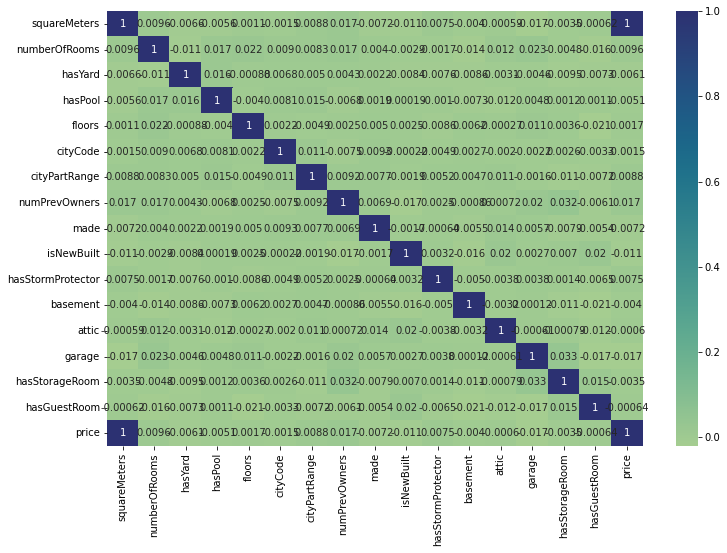

In [11]:
plt.figure(figsize = (12,8))
sns.heatmap(paris.corr(), annot = True, cmap = 'crest')

**observation** <br>
From the correlation heatmap, price and squaremeters have a strong positive correlation however, all the other columns, are not correlated 

##### Univariate analysis

In [12]:
# changing all column names to lowercase 
paris.columns = paris.columns.str.lower()
print(paris.columns)

Index(['squaremeters', 'numberofrooms', 'hasyard', 'haspool', 'floors',
       'citycode', 'citypartrange', 'numprevowners', 'made', 'isnewbuilt',
       'hasstormprotector', 'basement', 'attic', 'garage', 'hasstorageroom',
       'hasguestroom', 'price'],
      dtype='object')


In [13]:
paris["squaremeters"].nunique()

9483

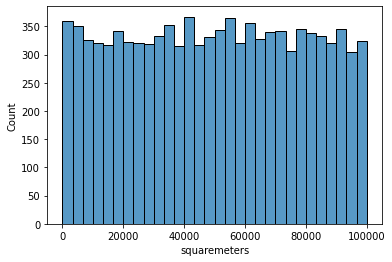

In [14]:
# square meters column
sns.histplot(x = "squaremeters", data = paris, bins = 30)


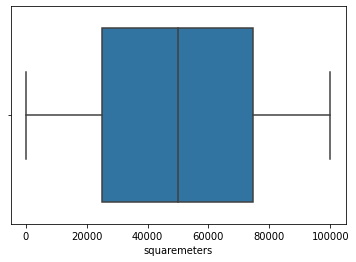

In [15]:
sns.boxplot(paris['squaremeters'],orient = 'v')
plt.show()

In [16]:
paris['numberofrooms'].nunique()

100

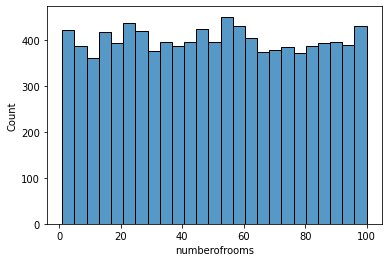

In [17]:
sns.histplot(x = 'numberofrooms', data = paris, bins = 25)

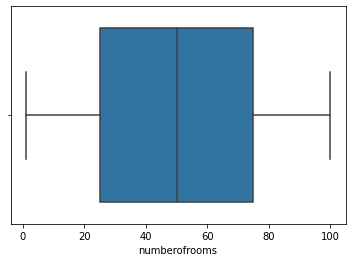

In [18]:
sns.boxplot(paris['numberofrooms'],orient = 'v')
plt.show()

In [19]:
paris['hasyard'].nunique()

2

In [20]:
paris['hasyard'].unique()

array([0, 1])

<BarContainer object of 10000 artists>

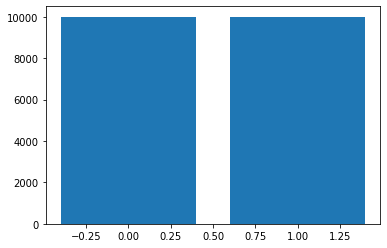

In [21]:
plt.bar(paris["hasyard"], paris.index)

In [22]:
paris['haspool'].unique()

array([1, 0])

In [23]:
# plot barchart for the "haspool" column

In [24]:
paris["floors"].nunique()

100

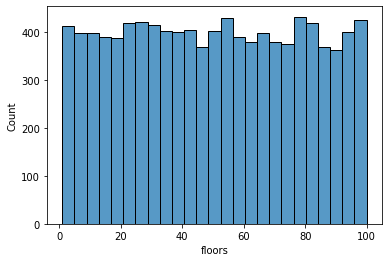

In [25]:
sns.histplot(x = "floors", data = paris, bins = 25)

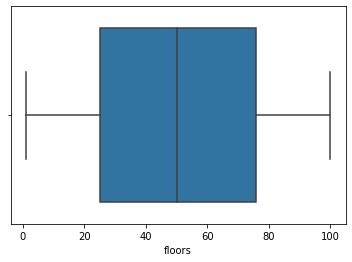

In [26]:
sns.boxplot(paris['floors'],orient = 'v')
plt.show()

In [27]:
paris["citycode"].nunique()

9509

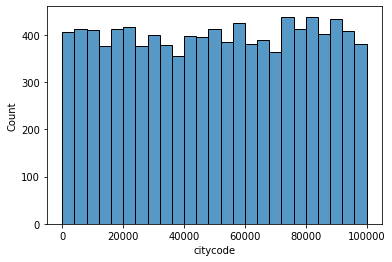

In [28]:
sns.histplot(x = "citycode", data = paris, bins = 25)

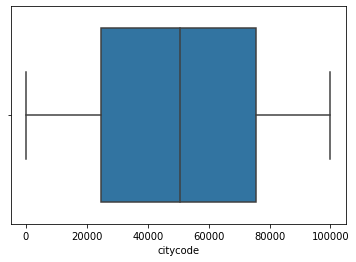

In [29]:
sns.boxplot(paris['citycode'],orient = 'v')
plt.show()

In [30]:
paris['citypartrange'].nunique()

10

In [31]:
paris['citypartrange'].unique()

array([ 3,  8,  6, 10,  5,  4,  2,  7,  9,  1])

In [32]:
count_range = paris.groupby(['citypartrange'] ,as_index =True,sort = True)[['citypartrange']].count()
count_range

,citypartrange
citypartrange,
1,994
2,990
3,999
4,1001
5,1031
6,965
7,984
8,1035
9,997


<BarContainer object of 10 artists>

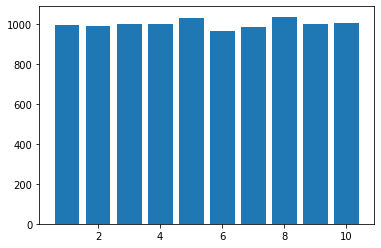

In [33]:
plt.bar(count_range.index, count_range["citypartrange"])

In [34]:
paris["numprevowners"].nunique()

10

In [35]:
paris["numprevowners"].unique()

array([ 8,  6,  4,  7,  9,  3,  2,  5,  1, 10])

In [36]:
# barchart

In [37]:
paris['made'].nunique()

32

In [38]:
#Barchart with figsize

In [39]:
paris["isnewbuilt"].unique()

array([0, 1])

In [40]:
#bar chart

In [41]:
paris['hasstormprotector'].unique()

array([1, 0])

In [42]:
# barchart

In [43]:
paris['basement'].nunique()

6352

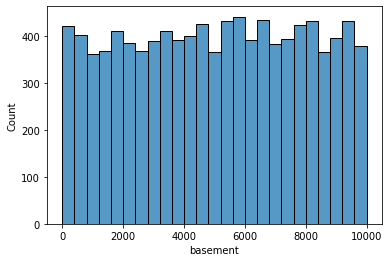

In [44]:
sns.histplot(x = 'basement', data = paris, bins = 25)

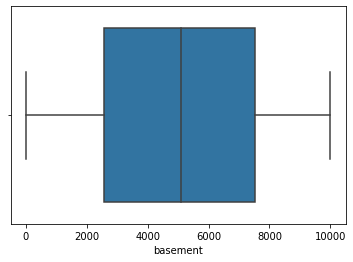

In [45]:
sns.boxplot(paris['basement'],orient = 'v')
plt.show()

In [46]:
paris['attic'].nunique()

6267

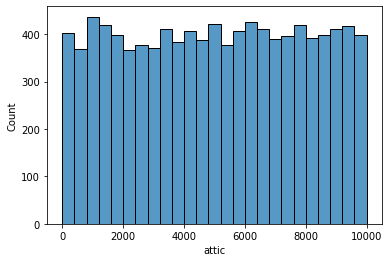

In [47]:
sns.histplot(x = 'attic', data = paris, bins = 25)

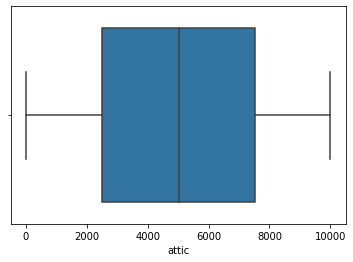

In [48]:
sns.boxplot(paris['attic'],orient = 'v')
plt.show()

In [49]:
paris['garage'].nunique()

901

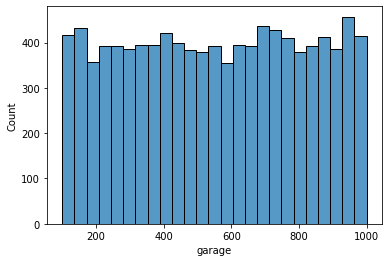

In [50]:
sns.histplot(x = 'garage', data = paris, bins = 25)

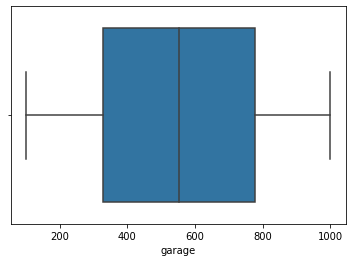

In [51]:
sns.boxplot(paris['garage'],orient = 'v')
plt.show()

In [52]:
paris['hasstorageroom'].unique()

array([0, 1])

In [53]:
# bar chart

In [54]:
paris['hasguestroom'].unique()

array([ 7,  2,  9,  3,  4,  1,  5, 10,  0,  8,  6])

In [55]:
paris['price'].nunique()

10000

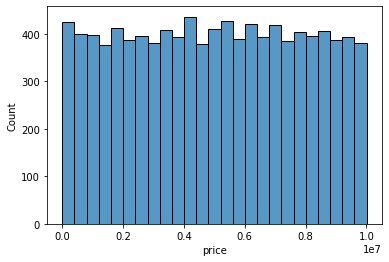

In [56]:
sns.histplot(x = 'price', data = paris, bins = 25)

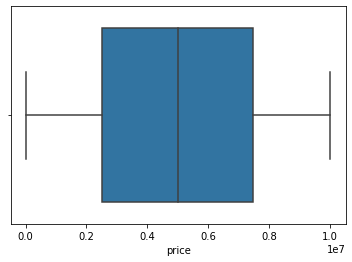

In [57]:
sns.boxplot(paris['price'],orient = 'v')
plt.show()

##### Multivariate analysis

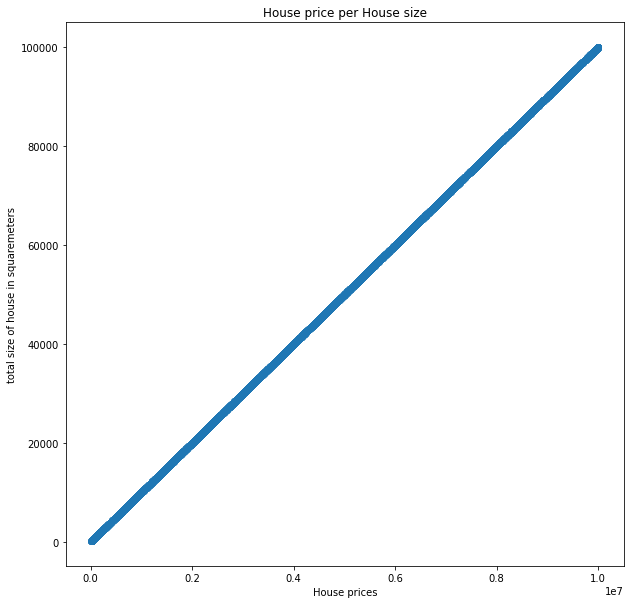

In [58]:
# based on the correlation heatmap 
#scatter plot of the price and squaremeters columns
plt.figure(figsize = (10,10))
plt.scatter(paris["price"], paris["squaremeters"])
plt.xlabel("House prices")
plt.ylabel('total size of house in squaremeters')
plt.title("House price per House size")
plt.show()

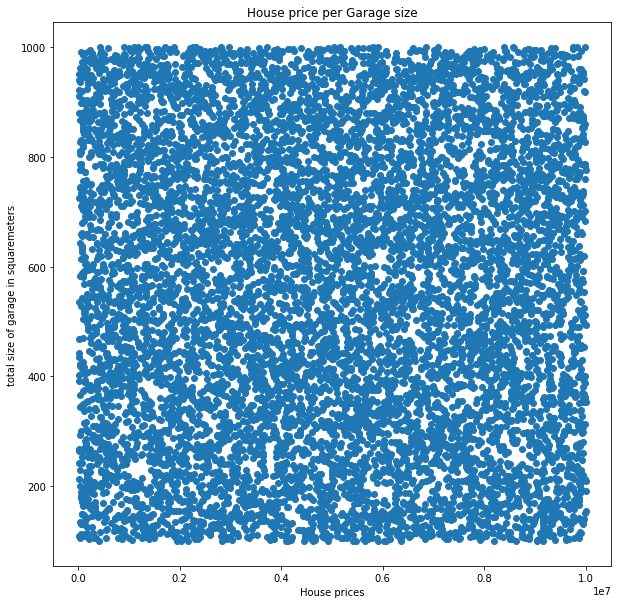

In [59]:
# checking house price and garage size
plt.figure(figsize = (10,10))
plt.scatter(paris["price"], paris["garage"])
plt.xlabel("House prices")
plt.ylabel('total size of garage in squaremeters')
plt.title("House price per Garage size")
plt.show()

## Splitting the data

In [60]:
X = paris.drop('price', axis = 1)
y = paris['price']

print("**X**")
print(X.head(3))
print('**y**')
print(y.head(3))

**X**
   squaremeters  numberofrooms  hasyard  haspool  floors  citycode  \
0         75523              3        0        1      63      9373   
1         80771             39        1        1      98     39381   
2         55712             58        0        1      19     34457   

   citypartrange  numprevowners  made  isnewbuilt  hasstormprotector  \
0              3              8  2005           0                  1   
1              8              6  2015           1                  0   
2              6              8  2021           0                  0   

   basement  attic  garage  hasstorageroom  hasguestroom  
0      4313   9005     956               0             7  
1      3653   2436     128               1             2  
2      2937   8852     135               1             9  
**y**
0           7,559,081.50
1           8,085,989.50
2           5,574,642.10
Name: price, dtype: float64


## Splitting the data into train_set and test_set

In [61]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

[Back to the Top](#Project-Overview)

## **Building of Model**

**Models**

1. Linear Regression
2. Lasso
3. Ridge
4. Decision tree 
5. Voting Regressor
6. Bagging (Boostrap Aggregation)
7. Random forest
8. AdaBoost
9. Gradient boost
10. XGBoost
11. Cat Boost

**In order to optimize the models, gridsearch with cross validation is applied to tune the hyperparameters of the different algorithms. Then, we test the balanced dataset's performance once more with the best parameters.**

### 1. Linear Regression

In [62]:
# Hyper parameter tuning??
lr = LinearRegression()
model_lr = lr.fit(X_train, y_train)

y_pred_lr = model_lr.predict(X_test)
rmse=MSE(y_pred_lr,y_test)
r2 = r2_score(y_test, y_pred_lr)

print("lr.coef_: {}\n".format(model_lr.coef_))
print("lr.intercept_: {}\n".format(model_lr.intercept_))
print("r2 score: {:.2f}".format(r2))

print("root mean squared: {:.2f}".format(rmse))

lr.coef_: [ 9.99998029e+01  5.67220139e-01  3.00639668e+03  3.00046503e+03
  5.44554058e+01 -7.66864002e-04  5.28676402e+01  1.53999747e+00
 -3.51169294e+00  1.17280457e+02  1.05928525e+02 -4.01710993e-03
 -6.91160385e-03  8.20377866e-02  4.43056144e+01 -6.55609374e+00]

lr.intercept_: 7329.61526736524

r2 score: 1.00
root mean squared: 3605360.36


Function for Plotting the actual values and the predicted values

In [63]:
a = y_test.reset_index(drop = True)

def plot_accuracy(predicted):
  p = pd.Series(predicted)

  plt.figure(figsize = (22,7))
  plt.plot(p, color = 'red', label = "actual values")
  plt.plot(a, color = 'blue', label = "predicted values", alpha = 0.4)
  plt.legend
  plt.show()

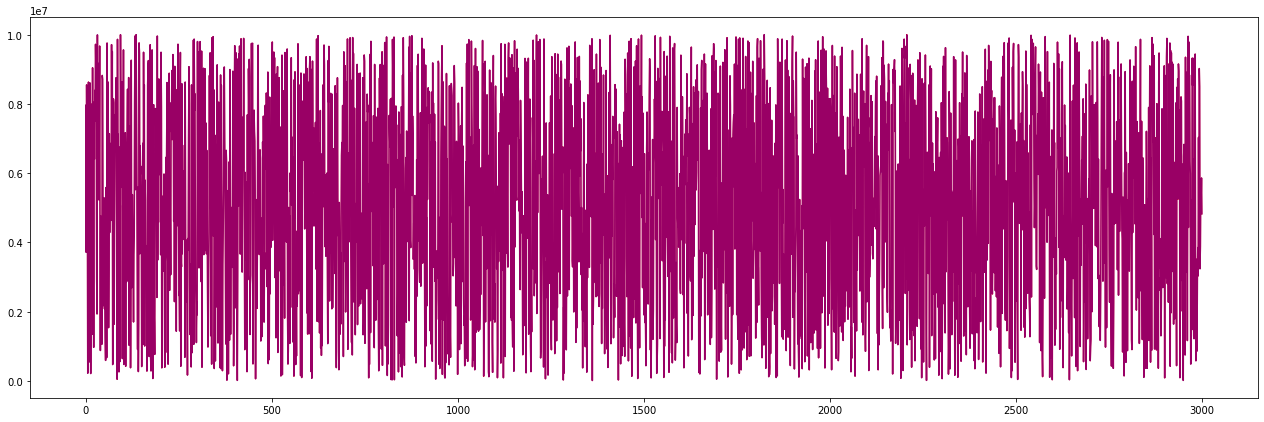

In [64]:
plot_accuracy(y_pred_lr)

### 2. Lasso

In [65]:
lss = Lasso(random_state = 42)
kf = KFold(n_splits=5, shuffle=True, random_state=42)
# Grid search and cross validation
params_lss = {'alpha':[0.02, 0.024, 0.025, 0.026, 0.03]}
grid_lss = GridSearchCV(lss, params_lss, cv = kf, n_jobs = 1)
grid_lss.fit(X_train,y_train)

#checking for the test score, best parameters and cross-validation accuracies
print('Best cross-validation acuracy: {:.2f}'.format(grid_lss.best_score_))
print('Best test score: {:.2f}'.format(grid_lss.score(X_test,y_test)))
print('Best parameters:',grid_lss.best_params_)

Best cross-validation acuracy: 1.00
Best test score: 1.00
Best parameters: {'alpha': 0.03}


In [66]:
lasso = Lasso(alpha = 0.03)
lasso.fit(X_train,y_train)
y_pred_l = lasso.predict(X_test)
rmse = MSE(y_test,y_pred_l)
r2 = r2_score(y_test,y_pred_l)
print('The root mean squared error is: {:.2f}'.format(rmse))
print('The R-squared is: {:.2f}'.format(r2))

The root mean squared error is: 3605365.16
The R-squared is: 1.00


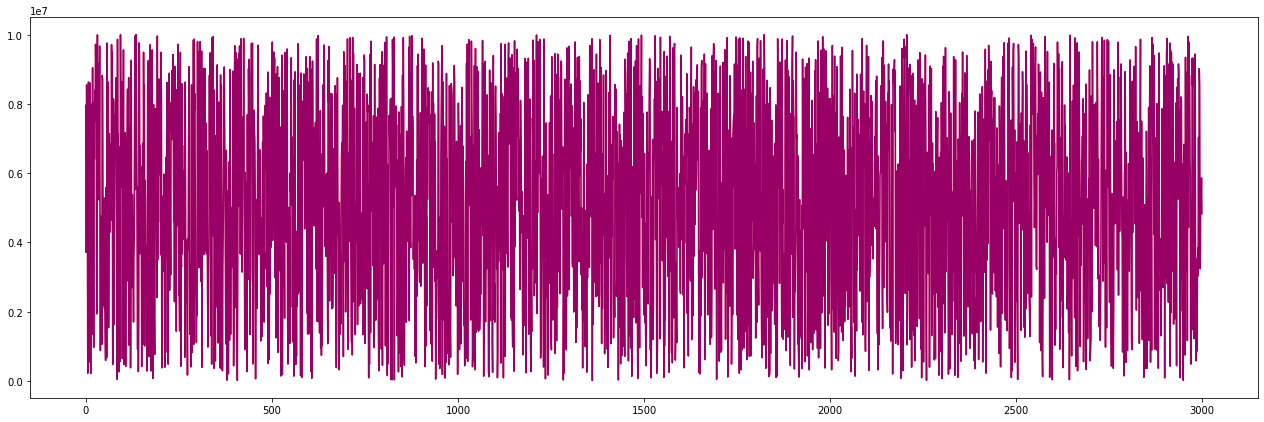

In [67]:
plot_accuracy(y_pred_l)

### 3. Ridge

In [68]:
rr = Ridge(random_state = 42)

# Grid search and cross validation
params_rr = {"alpha": np.arange(0.1, 1.0, 10),"solver": ["sag","lsqr"]}
grid_rr = GridSearchCV(rr, params_rr, cv = kf, n_jobs = 1)
grid_rr.fit(X_train,y_train)

#checking for the test score, best parameters and cross-validation accuracies
print('Best cross-validation acuracy: {:.2f}'.format(grid_rr.best_score_))
print('Best test score: {:.2f}'.format(grid_rr.score(X_test,y_test)))
print('Best parameters:',grid_rr.best_params_)

Best cross-validation acuracy: 1.00
Best test score: 1.00
Best parameters: {'alpha': 0.1, 'solver': 'lsqr'}


In [69]:
r = Ridge(alpha = 0.1, solver = 'lsqr')
r.fit(X_train,y_train)
y_pred_r = r.predict(X_test)
rmse = MSE(y_test,y_pred_r)
r2 = r2_score(y_test,y_pred_r)
print('The root mean squared error is: {:.2f}'.format(rmse))
print('The R-squared is: {:.2f}'.format(r2))

The root mean squared error is: 10639216.80
The R-squared is: 1.00


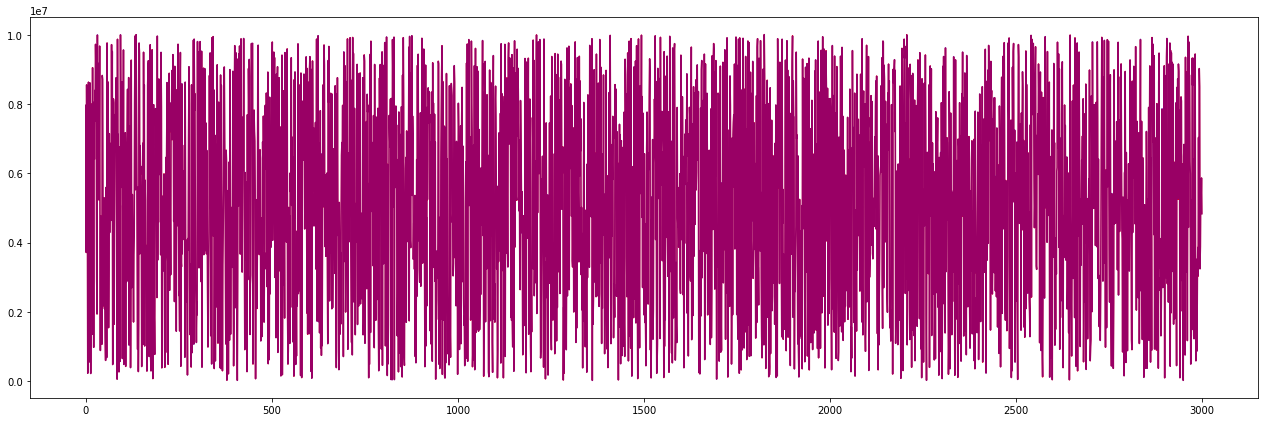

In [70]:
plot_accuracy(y_pred_r)

### 4. Decision Tree

In [71]:
dtr = DecisionTreeRegressor(random_state = 42)
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Grid search and cross validation
params_dt = {'max_depth': [3, 4,5, 6],'min_samples_leaf': [0.04, 0.06, 0.08],'max_features': [0.2, 0.4,0.6, 0.8]}
grid_dt = GridSearchCV(dtr, params_dt, cv = kf, n_jobs = 1)
grid_dt.fit(X_train,y_train)

#checking for the test score, best parameters and cross-validation accuracies
print('Best cross-validation acuracy: {:.2f}'.format(grid_dt.best_score_))
print('Best test score: {:.2f}'.format(grid_dt.score(X_test,y_test)))
print('Best parameters:',grid_dt.best_params_)

Best cross-validation acuracy: 0.98
Best test score: 0.98
Best parameters: {'max_depth': 5, 'max_features': 0.8, 'min_samples_leaf': 0.04}


In [72]:
dt = DecisionTreeRegressor(max_depth= 5, max_features= 0.8, min_samples_leaf= 0.04)
model_dt = dt.fit(X_train, y_train)

y_pred_dt = model_dt.predict(X_test)
rmse=MSE(y_pred_dt,y_test)
r2 = r2_score(y_test, y_pred_dt)

print("r2 score: {:.2f}".format(r2))

print("mean squared error: {:.2f}".format(rmse))

r2 score: 0.99
mean squared error: 59351355773.44


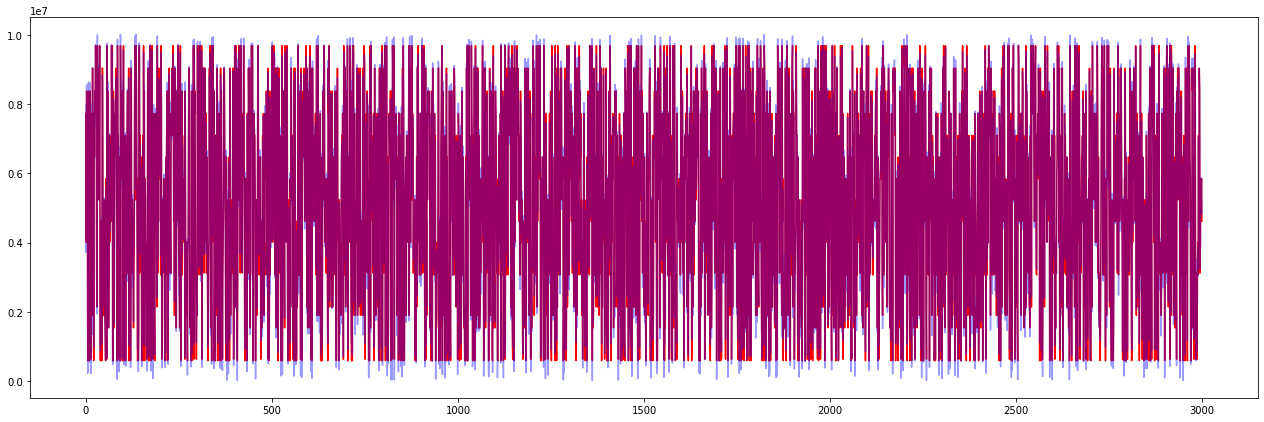

In [73]:
plot_accuracy(y_pred_dt)

### 5. Random Forest

In [74]:
rfr = RandomForestRegressor(random_state = 42)

# Grid search and cross validation
params_rfr = {'max_features': [1,2,3,4,5,6,7,8,9,10],
              'max_leaf_nodes':[1,2, 3,4,5,6,7,8,9,10]}
grid_rfr = GridSearchCV(rfr, params_rfr, cv = kf, n_jobs = 1)
grid_rfr.fit(X_train,y_train)

#checking for the test score, best parameters and cross-validation accuracies
print('Best cross-validation acuracy: {:.2f}'.format(grid_rfr.best_score_))
print('Best test score: {:.2f}'.format(grid_rfr.score(X_test,y_test)))
print('Best parameters:',grid_rfr.best_params_)
# 10 was the highest param fro the grid search. Try and increase it to see if you get better params

Best cross-validation acuracy: 0.96
Best test score: 0.97
Best parameters: {'max_features': 10, 'max_leaf_nodes': 10}


In [75]:
rf = RandomForestRegressor(max_features = 10, max_leaf_nodes = 10)
rf.fit(X_train,y_train)
y_pred_rf = rf.predict(X_test)
rmse = MSE(y_test,y_pred_rf)
r2 = r2_score(y_test,y_pred_rf)
print('The root mean squared error is: {:.2f}'.format(rmse))
print('The R-squared is: {:.2f}'.format(r2))

The root mean squared error is: 327856388772.90
The R-squared is: 0.96


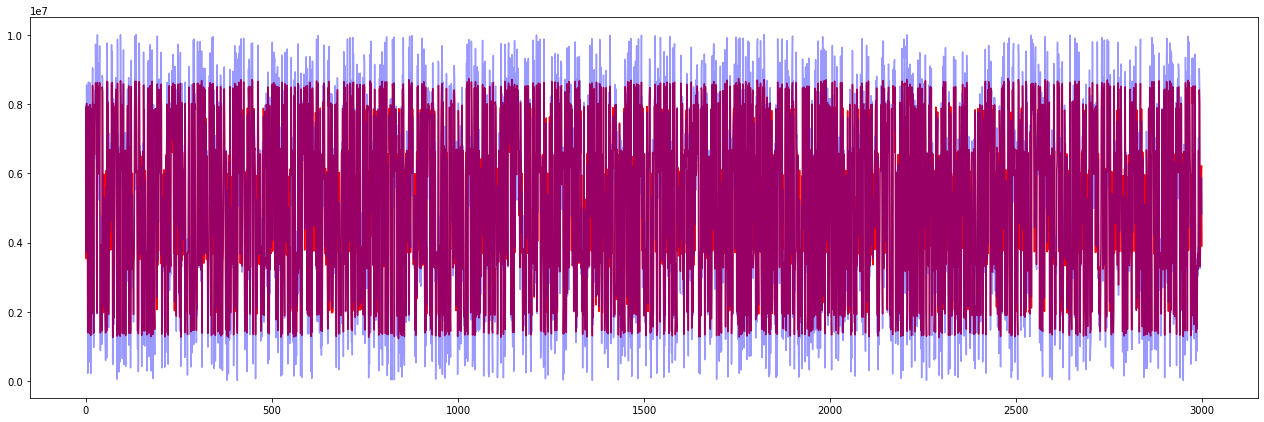

In [76]:
plot_accuracy(y_pred_rf)

## 6. Voting Regressor 

In [77]:
# Instantiate individual regressors
lr = LinearRegression()
lasso= Lasso(alpha = 0.03)
rf = RandomForestRegressor(max_features = 10, max_leaf_nodes = 10)
dt = DecisionTreeRegressor(max_depth= 5, max_features= 0.8, min_samples_leaf= 0.04)
r = Ridge(alpha = 0.1, solver = 'lsqr')
# Define a list called regressor that contains the tuples (regressor_name, regressor)
regressors = [('Linear Regression', lr),
('Lasso', lasso),
('Random Forest Regressor', rf),
('Decision Tree Regressor', dt), ('Ridge', r)]


In [78]:
# Iterate over the defined list of tuples containing the regressors
for model_name, model in regressors:
        #fit model to the training set 
        model.fit(X_train,y_train)
        # Predict the labels of the test set
        model_y_pred = model.predict(X_test)
        # Evaluate the accuracy of model on the test set
        print('{:s} : {:.2f}'.format(model_name, r2_score(y_test, model_y_pred)))

Linear Regression : 1.00
Lasso : 1.00
Random Forest Regressor : 0.97
Decision Tree Regressor : 0.78
Ridge : 1.00


In [80]:
vr = VotingRegressor(estimators=regressors)

# Fit 'vr' to the traing set and predict test set labels (ROS)
vr.fit(X_train, y_train)
vr_y_pred = vr.predict(X_test)

#checking for the test and train accuracies
print("Test score:{:.2f}".format(vr.score(X_test,y_test)))
print("Train score:{:.2f}\n".format(vr.score(X_train,y_train)))
print('Accuracy :{0:0.2f}'.format(r2_score(vr_y_pred , y_test))) 

Test score:1.00
Train score:1.00

Accuracy :1.00


### 7. AdaBoost

In [82]:
abr = AdaBoostRegressor(random_state = 42)

# Grid search and cross validation
params_abr = {'n_estimators':[500,1000,2000],'learning_rate':[.001,0.01,.1]}
grid_abr = GridSearchCV(abr, params_abr, cv = kf, n_jobs = 1)
grid_abr.fit(X_train,y_train)

#checking for the test score, best parameters and cross-validation accuracies
print('Best cross-validation acuracy: {:.2f}'.format(grid_abr.best_score_))
print('Best test score: {:.2f}'.format(grid_abr.score(X_test,y_test)))
print('Best parameters:',grid_abr.best_params_)
# 10 was the highest param fro the grid search. Try and increase it to see if you get better params

Best cross-validation acuracy: 0.98
Best test score: 0.98
Best parameters: {'learning_rate': 0.1, 'n_estimators': 500}


In [83]:
ab = AdaBoostRegressor(learning_rate =  0.1, n_estimators = 500)
ab.fit(X_train,y_train)
y_pred_ab = ab.predict(X_test)
rmse = MSE(y_test,y_pred_ab)
r2 = r2_score(y_test,y_pred_ab)
print('The root mean squared error is: {:.2f}'.format(rmse))
print('The R-squared is: {:.2f}'.format(r2))

The root mean squared error is: 126564249624.71
The R-squared is: 0.99


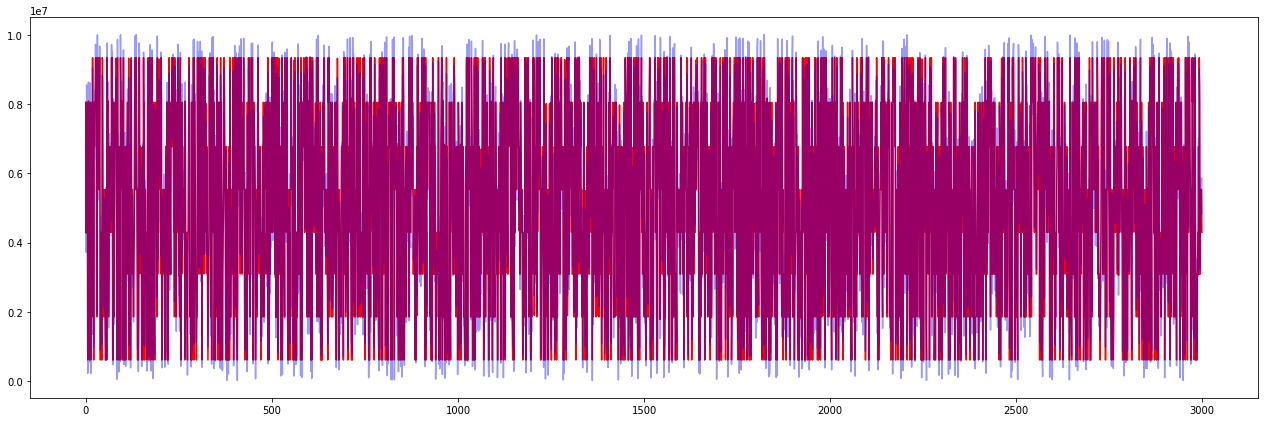

In [84]:
plot_accuracy(y_pred_ab)

### 8. Gradient Boost

In [85]:
gb = GradientBoostingRegressor()
gb.fit(X_train,y_train)
y_pred_gb = gb.predict(X_test)
rmse = MSE(y_test,y_pred_gb)
r2 = r2_score(y_test,y_pred_gb)
print('The root mean squared error is: {:.2f}'.format(rmse))
print('The R-squared is: {:.2f}'.format(r2))

The root mean squared error is: 411399741.47
The R-squared is: 1.00


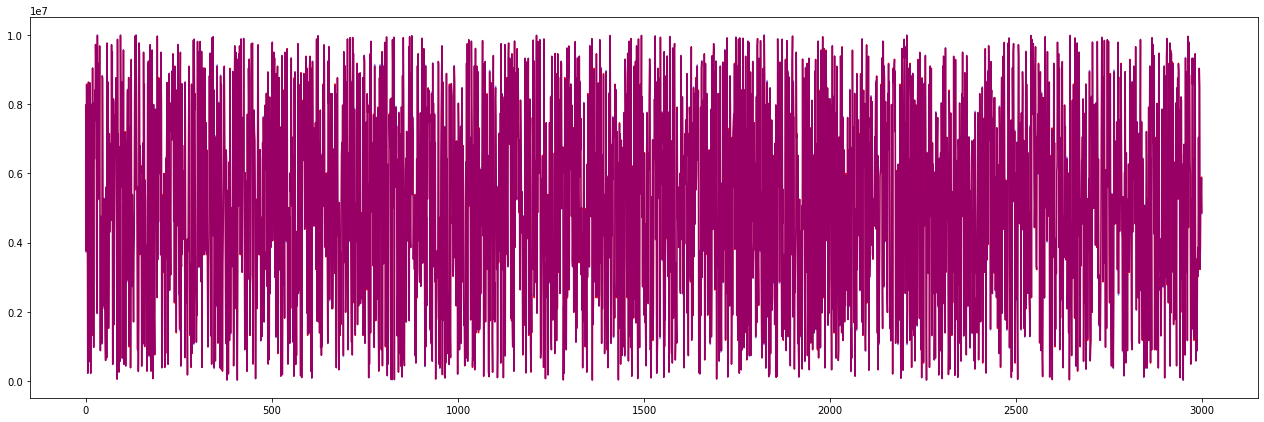

In [86]:
plot_accuracy(y_pred_gb)

### 9. Bagging

In [87]:
b = BaggingRegressor()
b.fit(X_train,y_train)
y_pred_b = b.predict(X_test)
rmse = MSE(y_test,y_pred_b)
r2 = r2_score(y_test,y_pred_b)
print('The root mean squared error is: {:.2f}'.format(rmse))
print('The R-squared is: {:.2f}'.format(r2))

The root mean squared error is: 18669480.86
The R-squared is: 1.00


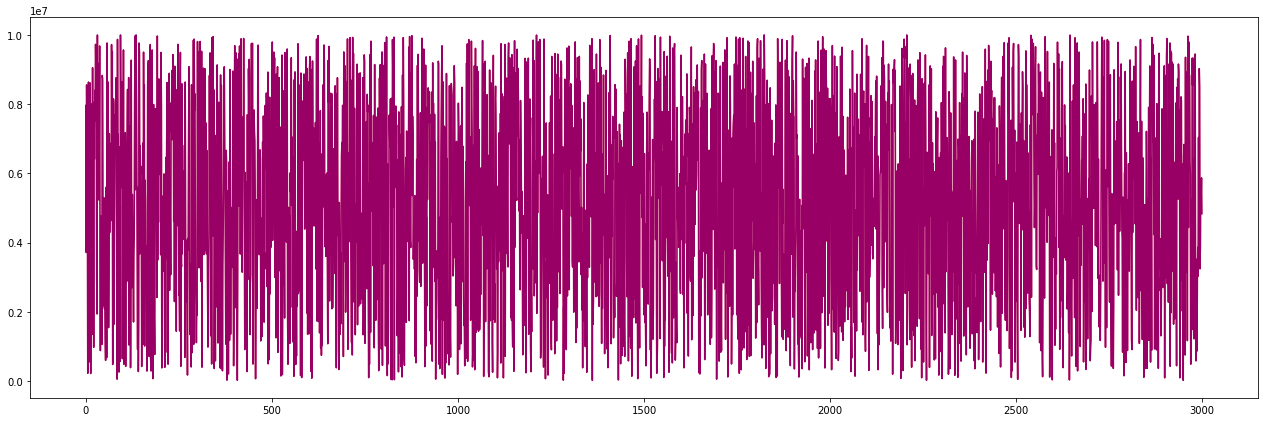

In [88]:
plot_accuracy(y_pred_b)

### 10. XG Boost

In [89]:
xgb = XGBRegressor()
xgb.fit(X_train,y_train)
y_pred_xgb = xgb.predict(X_test)
rmse = MSE(y_test,y_pred_xgb)
r2 = r2_score(y_test,y_pred_xgb)
print('The root mean squared error is: {:.2f}'.format(rmse))
print('The R-squared is: {:.2f}'.format(r2))

[11:42:47] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
The root mean squared error is: 417053725.58
The R-squared is: 1.00


In [ ]:
plot_accuracy(y_pred_xgb)

### 11. Cat Boost

In [90]:
cb = CatBoostRegressor()
cb.fit(X_train,y_train)
y_pred_cb = cb.predict(X_test)
rmse = MSE(y_test,y_pred_cb)
r2 = r2_score(y_test,y_pred_cb)

Learning rate set to 0.055681
0:	learn: 2707972.5312136	total: 49.2ms	remaining: 49.1s
1:	learn: 2566235.1753513	total: 51.2ms	remaining: 25.6s
2:	learn: 2431922.6021261	total: 53.4ms	remaining: 17.7s
3:	learn: 2304587.2355430	total: 57.2ms	remaining: 14.2s
4:	learn: 2182294.6184492	total: 59.4ms	remaining: 11.8s
5:	learn: 2068087.3337064	total: 61.8ms	remaining: 10.2s
6:	learn: 1960899.8811610	total: 64.2ms	remaining: 9.11s
7:	learn: 1856969.7018415	total: 66.6ms	remaining: 8.26s
8:	learn: 1764038.4382275	total: 69ms	remaining: 7.6s
9:	learn: 1675412.3445061	total: 71.2ms	remaining: 7.05s
10:	learn: 1588846.9784817	total: 73.7ms	remaining: 6.63s
11:	learn: 1510667.2940339	total: 76.2ms	remaining: 6.27s
12:	learn: 1431553.1744364	total: 78.6ms	remaining: 5.97s
13:	learn: 1355758.5051218	total: 81.4ms	remaining: 5.73s
14:	learn: 1286831.9312141	total: 83.6ms	remaining: 5.49s
15:	learn: 1220962.9150781	total: 86ms	remaining: 5.29s
16:	learn: 1158592.2635018	total: 88.8ms	remaining: 5.13s

In [ ]:
print('The root mean squared error is: {:.2f}'.format(rmse))
print('The R-squared is: {:.2f}'.format(r2))

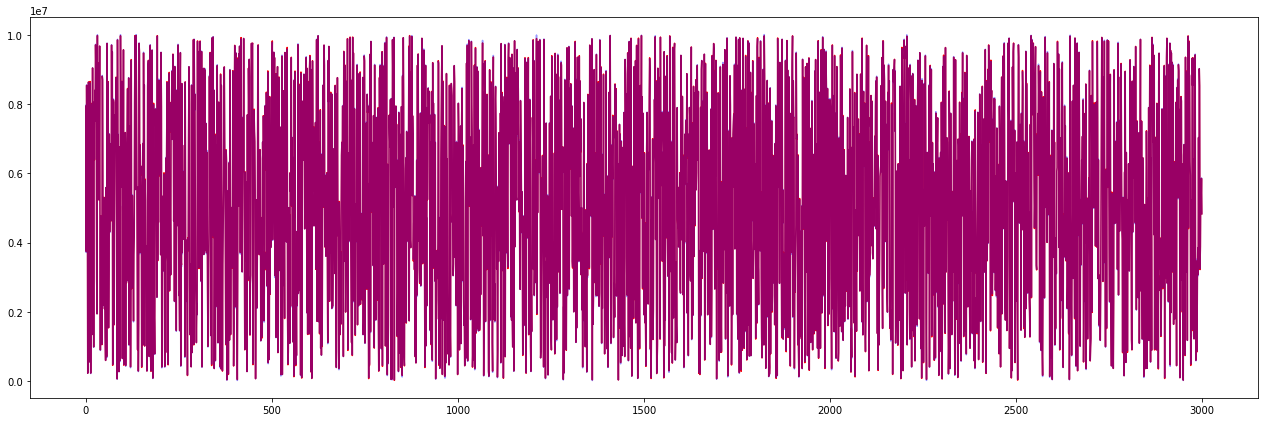

In [92]:
plot_accuracy(y_pred_cb)

## Model-Selection

### Creating a dataframe of models and correcpondig scores

**root mean squared error**

In [93]:
linear_rmse = MSE(y_test, y_pred_lr)
ridge_rmse = MSE(y_test, y_pred_r)
lasso_rmse = MSE(y_test, y_pred_l)
dtree_rmse = MSE(y_test, y_pred_dt)
randomf_rmse = MSE(y_test, y_pred_rf)
vr_rmse = MSE(y_test,vr_y_pred)
ada_rmse = MSE(y_test, y_pred_ab)
gradient_rmse = MSE(y_test, y_pred_gb)
bagging_rmse = MSE(y_test, y_pred_b)
xgboost_rmse = MSE(y_test, y_pred_xgb)
catboost_rmse = MSE(y_test, y_pred_cb)

**R squared scores**

In [94]:
linear_r2 = r2_score(y_test, y_pred_lr)
ridge_r2 = r2_score(y_test, y_pred_r)
lasso_r2 = r2_score(y_test, y_pred_l)
dtree_r2 = r2_score(y_test, y_pred_dt)
randomf_r2 = r2_score(y_test, vr_y_pred)
vr_r2 = r2_score(y_test,y_pred_rf)
ada_r2 = r2_score(y_test, y_pred_ab)
gradient_r2 = r2_score(y_test, y_pred_gb)
bagging_r2 = r2_score(y_test, y_pred_b)
xgboost_r2 = r2_score(y_test, y_pred_xgb)
catboost_r2 = r2_score(y_test, y_pred_cb)

In [95]:
# creating model list
model_list = ['Linear Regression', "Ridge", "Lasso", "Decision Tree", "Random Forest","Voting Regressor" ,"Ada Boost", "Gradient Boost", "Bagging", "XGBoost", "Cat Boost"]

root_mean_square_error = [linear_rmse, ridge_rmse, lasso_rmse, dtree_rmse, randomf_rmse, vr_rmse, ada_rmse, gradient_rmse, 
                                bagging_rmse, xgboost_rmse, catboost_rmse]

r_squared = [linear_r2, ridge_r2, lasso_r2, dtree_r2, randomf_r2, vr_r2,ada_r2, gradient_r2, bagging_r2, xgboost_r2, catboost_r2]

In [96]:
# creating data frame
performance = pd.DataFrame({'Model': model_list,
                           "Root mean square error": root_mean_square_error,
                           "R squared": r_squared})
performance.set_index("Model")

,Root mean square error,R squared
Model,,
Linear Regression,"3,605,360.36",1.00
Ridge,"10,639,216.80",1.00
Lasso,"3,605,365.16",1.00
Decision Tree,"59,351,355,773.44",0.99
Random Forest,"327,856,388,772.90",1.00
Voting Regressor,"23,455,050,993.71",0.96
Ada Boost,"126,564,249,624.71",0.99
Gradient Boost,"411,399,741.47",1.00
Bagging,"18,669,480.86",1.00


In [97]:
#Sorting by r squared 
performance = performance.sort_values(['R squared', 'Root mean square error'],ascending=[False,False])
performance = performance.reset_index(drop=True)
performance

,Model,Root mean square error,R squared
0,Linear Regression,"3,605,360.36",1.00
1,Lasso,"3,605,365.16",1.00
2,Ridge,"10,639,216.80",1.00
3,Bagging,"18,669,480.86",1.00
4,Cat Boost,"362,315,626.67",1.00
5,Gradient Boost,"411,399,741.47",1.00
6,XGBoost,"417,053,725.58",1.00
7,Random Forest,"327,856,388,772.90",1.00
8,Decision Tree,"59,351,355,773.44",0.99
9,Ada Boost,"126,564,249,624.71",0.99


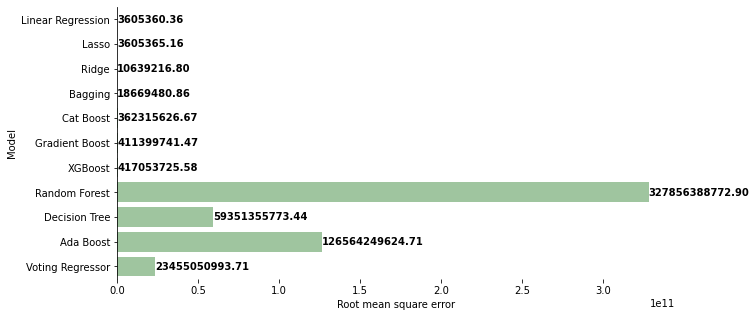

In [98]:
plt.figure(figsize=(10,5))
ax = sns.barplot(y="Model", x="Root mean square error", data = performance, color = "g", alpha = 0.4)
sns.despine(top=True, right=True, left=False, bottom=True)
for rect in ax.patches:
    ax.text (rect.get_width(), rect.get_y() + rect.get_height() / 2,"%.2f"% rect.get_width(), weight='bold',ha = 'left', va = 'center')
plt.show()

## Conclusion

After training each of the models, linear regression, lasso, ridge, bagging and cat bost are the top 5 models respectively.
However, **Linear regression is our final model with a root mean square of 3,605,360.36 and r squared of 1**

[Back to the Top](#Project-Overview)